 <a id="top"></a> <br>
## Notebook  Content
1. [Introduction](#1)
1. [Load packages](#2)
    1. [import](21)
    1. [Setup](22)
    1. [Version](23)
1. [Problem Definition](#3)
    1. [Problem Feature](#31)
    1. [Aim](#32)
    1. [Variables](#33)
    1. [Evaluation](#34)
1. [Exploratory Data Analysis(EDA)](#4)
    1. [Data Collection](#41)
    1. [Visualization](#42)
    1. [Data Preprocessing](#43)
1. [Machine Learning Explainability for Santander](#5)
    1. [Permutation Importance](#51)
    1. [How to calculate and show importances?](#52)
    1. [What can be inferred from the above?](#53)
    1. [Partial Dependence Plots](#54)
1. [Model Development](#6)
    1. [lightgbm](#61)
    1. [RandomForestClassifier](#62)
    1. [DecisionTreeClassifier](#63)
    1. [CatBoostClassifier](#64)
    1. [Funny Combine](#65)
1. [References](#7)

 <a id="1"></a> <br>
## 1- Introduction
At [Santander](https://www.santanderbank.com) their mission is to help people and businesses prosper. they are always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals.
<img src='https://www.smava.de/kredit/wp-content/uploads/2015/12/santander-bank.png' width=400 height=400>

In this kernel we are going to create a **Machine Learning Explainability** for **Santander** based this perfect [course](https://www.kaggle.com/learn/machine-learning-explainability) in kaggle.
><font color="red"><b>Note: </b></font>
how to extract **insights** from models?

<a id="2"></a> <br>
## 2- A Data Science Workflow for Santander 
Of course, the same solution can not be provided for all problems, so the best way is to create a **general framework** and adapt it to new problem.

**You can see my workflow in the below image** :

 <img src="http://s8.picofile.com/file/8342707700/workflow2.png"  />

**You should feel free	to	adjust 	this	checklist 	to	your needs**
###### [Go to top](#top)

 <a id="2"></a> <br>
 ## 2- Load packages
  <a id="21"></a> <br>
## 2-1 Import

In [1]:
from IPython.display import display
import matplotlib.patches as patch
import matplotlib.pyplot as plt
from sklearn.svm import NuSVR
from scipy.stats import norm
from sklearn import svm
import seaborn as sns
import pandas as pd
import warnings
import glob
import sys
import os
import gc

 <a id="22"></a> <br>
##  2-2 Setup

In [2]:
%matplotlib inline
%precision 4
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
np.set_printoptions(suppress=True)
pd.set_option("display.precision", 15)

 <a id="23"></a> <br>
## 2-3 Version


In [3]:
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

pandas: 0.23.4
numpy: 1.15.4
Python: 3.7.1 (default, Dec 14 2018, 19:28:38) 
[GCC 7.3.0]


<a id="3"></a> 
<br>
## 3- Problem Definition
In this **challenge**, we should help this **bank**  identify which **customers** will make a **specific transaction** in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data we have available to solve this **problem**.


<a id="31"></a> 
### 3-1 Problem Feature

1. train.csv - the training set.
1. test.csv - the test set. The test set contains some rows which are not included in scoring.
1. sample_submission.csv - a sample submission file in the correct format.


<a id="32"></a> 
### 3-2 Aim
In this competition, The task is to predict the value of **target** column in the test set.

<a id="33"></a> 
### 3-3 Variables

We are provided with an **anonymized dataset containing numeric feature variables**, the binary **target** column, and a string **ID_code** column.

The task is to predict the value of **target column** in the test set.


<a id="34"></a> 
## 3-4 evaluation
**Submissions** are evaluated on area under the [ROC curve](http://en.wikipedia.org/wiki/Receiver_operating_characteristic) between the predicted probability and the observed target.
<img src='https://upload.wikimedia.org/wikipedia/commons/6/6b/Roccurves.png' width=300 height=300>

In [4]:
from sklearn.metrics import roc_auc_score, roc_curve

<a id="4"></a> 
## 4- Exploratory Data Analysis(EDA)
 In this section, we'll analysis how to use graphical and numerical techniques to begin uncovering the structure of your data. 
*  Data Collection
*  Visualization
*  Data Preprocessing
*  Data Cleaning
<img src="http://s9.picofile.com/file/8338476134/EDA.png" width=400 height=400>

 <a id="41"></a> <br>
## 4-1 Data Collection

In [5]:
print(os.listdir("/home/altieris/datascience/data/santander-customer-transaction-prediction/"))

['train.csv', 'sample_submission.csv', 'test.csv']


In [6]:
# import Dataset to play with it
train= pd.read_csv("/home/altieris/datascience/data/santander-customer-transaction-prediction/train.csv")
test = pd.read_csv('/home/altieris/datascience/data/santander-customer-transaction-prediction/test.csv')

In [7]:
sample_submission = pd.read_csv('/home/altieris/datascience/data/santander-customer-transaction-prediction/sample_submission.csv')
sample_submission.head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


In [8]:
train.shape, test.shape, sample_submission.shape

((200000, 202), (200000, 201), (200000, 2))

In [9]:
train.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.925500000000000,-6.7863,11.908099999999999,5.093000000000000,11.460699999999999,-9.2834,5.1187,18.626600000000000,...,4.4354,3.9642,3.1364,1.691000000000000,18.522700000000000,-2.3978,7.8784,8.563499999999999,12.780300000000000,-1.091400000000000
1,train_1,0,11.500600000000000,-4.1473,13.858800000000000,5.388999999999999,12.362200000000000,7.0433,5.6208,16.533799999999999,...,7.6421,7.7214,2.5837,10.951599999999999,15.430500000000000,2.0339,8.1267,8.788900000000000,18.355999999999998,1.951800000000000
2,train_2,0,8.609299999999999,-2.7457,12.080500000000001,7.892800000000000,10.582500000000000,-9.0837,6.9427,14.615500000000001,...,2.9057,9.7905,1.6704,1.685800000000000,21.604199999999999,3.1417,-6.5213,8.267500000000000,14.722200000000001,0.396500000000000
3,train_3,0,11.060400000000000,-2.1518,8.952199999999999,7.195700000000000,12.584600000000000,-1.8361,5.8428,14.925000000000001,...,4.4666,4.7433,0.7178,1.421400000000000,23.034700000000001,-1.2706,-2.9275,10.292199999999999,17.969700000000000,-8.999599999999999
4,train_4,0,9.836900000000000,-1.4834,12.874599999999999,6.637500000000000,12.277200000000001,2.4486,5.9405,19.251400000000000,...,-1.4905,9.5214,-0.1508,9.194200000000000,13.287599999999999,-1.5121,3.9267,9.503100000000000,17.997399999999999,-8.810400000000000


 <a id="41"></a> <br>
##   4-1-1Data set fields

In [10]:
train.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [11]:
print(len(train.columns))

202


In [12]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB
None


 <a id="422"></a> <br>
## 4-2-2 numerical values Describe

In [13]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,...,200000.000000000000000,200000.000000000000000,200000.00000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000
mean,0.100490000000000,10.679914252000151,-1.627621689499992,10.715191851000073,6.796529157000018,11.078333240500118,-5.065317493499968,5.408948681499958,16.545849889500108,0.284161849999996,...,3.234439775999965,7.438408337000044,1.92783851400003,3.331773684500021,17.993784182999992,-0.142088433500005,2.303335243500019,8.908157683499990,15.870720248000522,-3.326536900499999
std,0.300652975806355,3.040050870668801,4.050044189955011,2.640894191799927,2.043319016359718,1.623149533936866,7.863266683476754,0.866607266216908,3.418075578937139,3.332633536717585,...,4.559921679910722,3.023271794723963,1.47842289233660,3.992030367901846,3.135161996426620,1.429372364408401,5.454369250069321,0.921625484493855,3.010945491221765,10.438015107352546
min,0.000000000000000,0.408400000000000,-15.043400000000000,2.117100000000000,-0.040200000000000,5.074800000000000,-32.562600000000003,2.347300000000000,5.349700000000000,-10.505500000000000,...,-14.093299999999999,-2.691700000000000,-3.81450000000000,-11.783400000000000,8.694400000000000,-5.261000000000000,-14.209600000000000,5.960600000000000,6.299300000000000,-38.852800000000002
25%,0.000000000000000,8.453850000000001,-4.740025000000000,8.722474999999999,5.254075000000000,9.883175000000000,-11.200350000000000,4.767700000000000,13.943800000000000,-2.317800000000000,...,-0.058825000000000,5.157400000000000,0.88977500000000,0.584600000000000,15.629799999999999,-1.170700000000000,-1.946925000000000,8.252800000000001,13.829700000000001,-11.208475000000000
50%,0.000000000000000,10.524750000000001,-1.608050000000000,10.580000000000000,6.825000000000000,11.108250000000000,-4.833150000000000,5.385100000000000,16.456800000000001,0.393700000000000,...,3.203600000000000,7.347750000000000,1.90130000000000,3.396350000000000,17.957949999999997,-0.172700000000000,2.408900000000000,8.888199999999999,15.934050000000001,-2.819550000000000
75%,0.000000000000000,12.758200000000000,1.358625000000000,12.516700000000000,8.324100000000000,12.261125000000002,0.924800000000000,6.002999999999999,19.102900000000002,2.937900000000000,...,6.406200000000000,9.512525000000000,2.94950000000000,6.205800000000000,20.396524999999997,0.829600000000000,6.556725000000000,9.593299999999999,18.064724999999999,4.836800000000000
max,1.000000000000000,20.315000000000001,10.376799999999999,19.352999999999998,13.188300000000000,16.671399999999998,17.251600000000000,8.447699999999999,27.691800000000001,10.151300000000001,...,18.440899999999999,16.716500000000000,8.40240000000000,18.281800000000000,27.928799999999999,4.272900000000000,18.321500000000000,12.000400000000001,26.079100000000000,28.500699999999998


 <a id="42"></a> <br>
## 4-2 Visualization

<a id="421"></a> 
### 4-2-1 hist

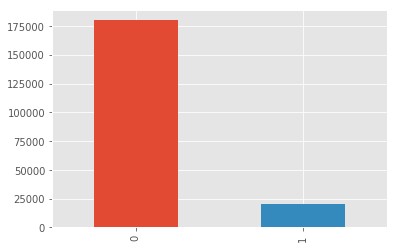

In [14]:
train['target'].value_counts().plot.bar();

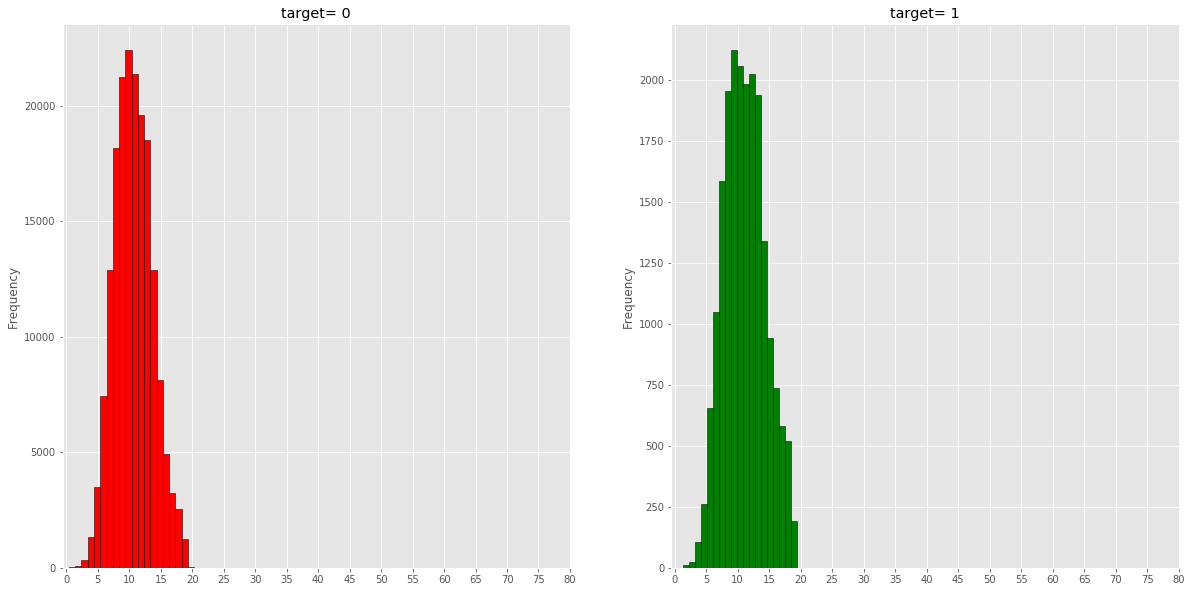

In [15]:
f,ax=plt.subplots(1,2,figsize=(20,10))
train[train['target']==0].var_0.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('target= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train[train['target']==1].var_0.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('target= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

 <a id="422"></a> <br>
## 4-2-2 Mean Frequency

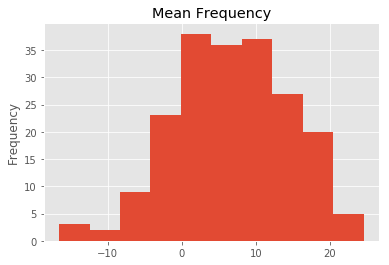

In [16]:
train[train.columns[2:]].mean().plot('hist');plt.title('Mean Frequency');

<a id="423"></a> 
### 4-2-3 countplot

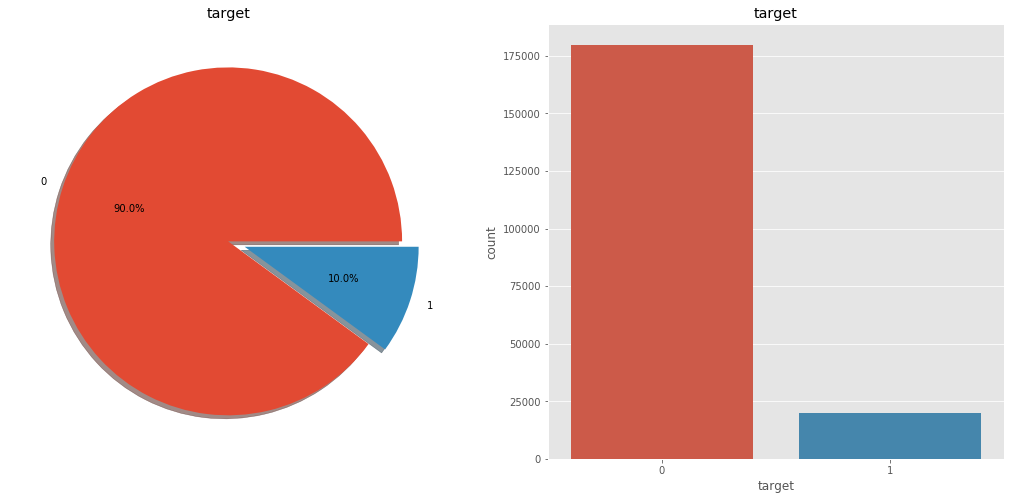

In [17]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['target'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('target',data=train,ax=ax[1])
ax[1].set_title('target')
plt.show()

<a id="424"></a> 
### 4-2-4 hist
if you check histogram for all feature, you will find that most of them are so similar

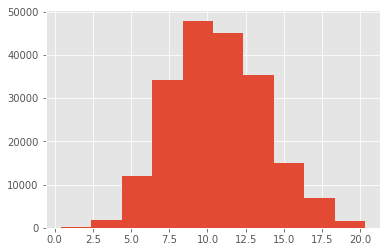

In [18]:
train["var_0"].hist();

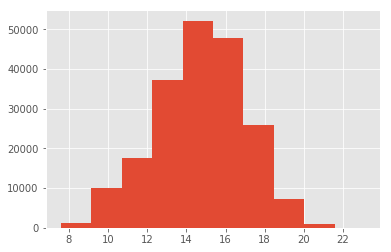

In [19]:
train["var_81"].hist();

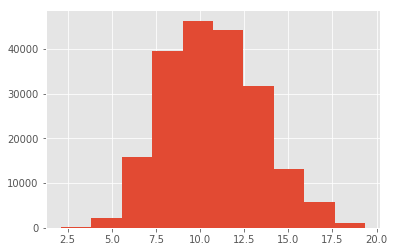

In [20]:
train["var_2"].hist();

<a id="426"></a> 
### 4-2-6 distplot
 the target in data set is **imbalance**

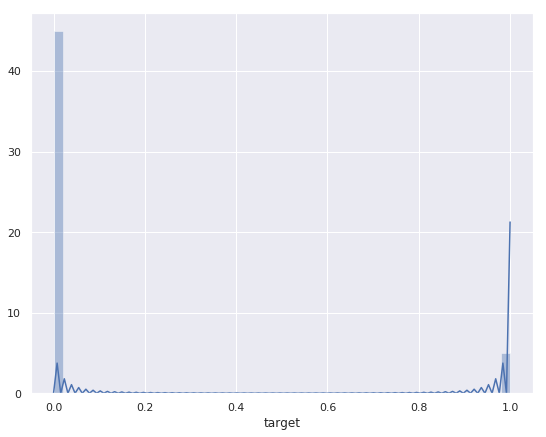

In [21]:
sns.set(rc={'figure.figsize':(9,7)})
sns.distplot(train['target']);

<a id="427"></a> 
### 4-2-7 violinplot

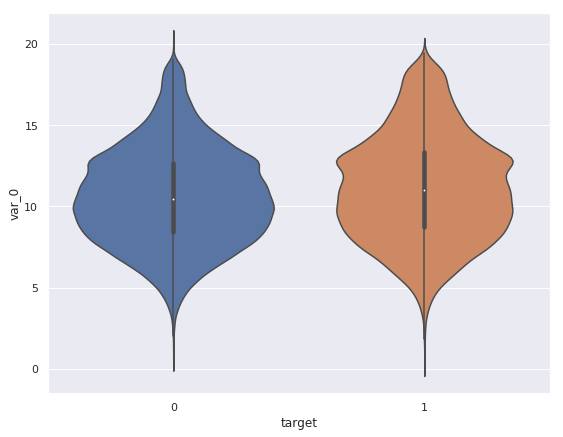

In [22]:
sns.violinplot(data=train,x="target", y="var_0")

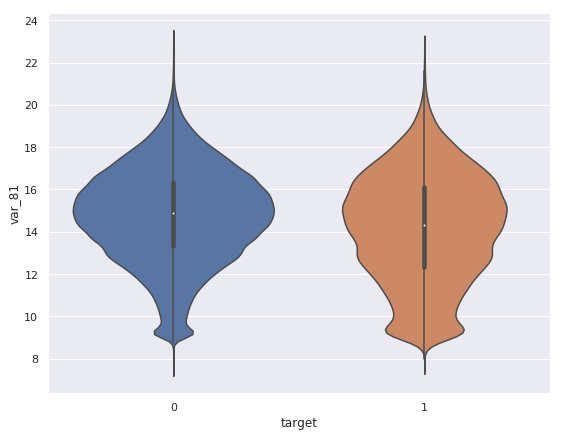

In [23]:
sns.violinplot(data=train,x="target", y="var_81")